In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
data = pd.read_csv('data.csv') # read in the data
data.head() # view first 5 rows of data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data = data.drop(['id', 'Unnamed: 32'], axis = 1) # drop irrelevant columns
data['diagnosis'] = data['diagnosis'].map({"M":1,"B":0}) # map 1 to malignant diagnosis and 0 otherwise

In [4]:
data.shape # get data (rows, columns) number

(569, 31)

In [5]:
data.columns # get data columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

C:\Users\pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Benign(0) and Malignant(1) Data')

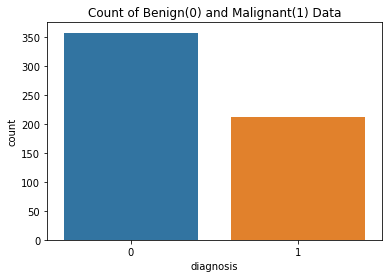

In [6]:
sns.countplot(data['diagnosis']) # view number of 0 and 1 classes
plt.title('Count of Benign(0) and Malignant(1) Data') # set title

In [7]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

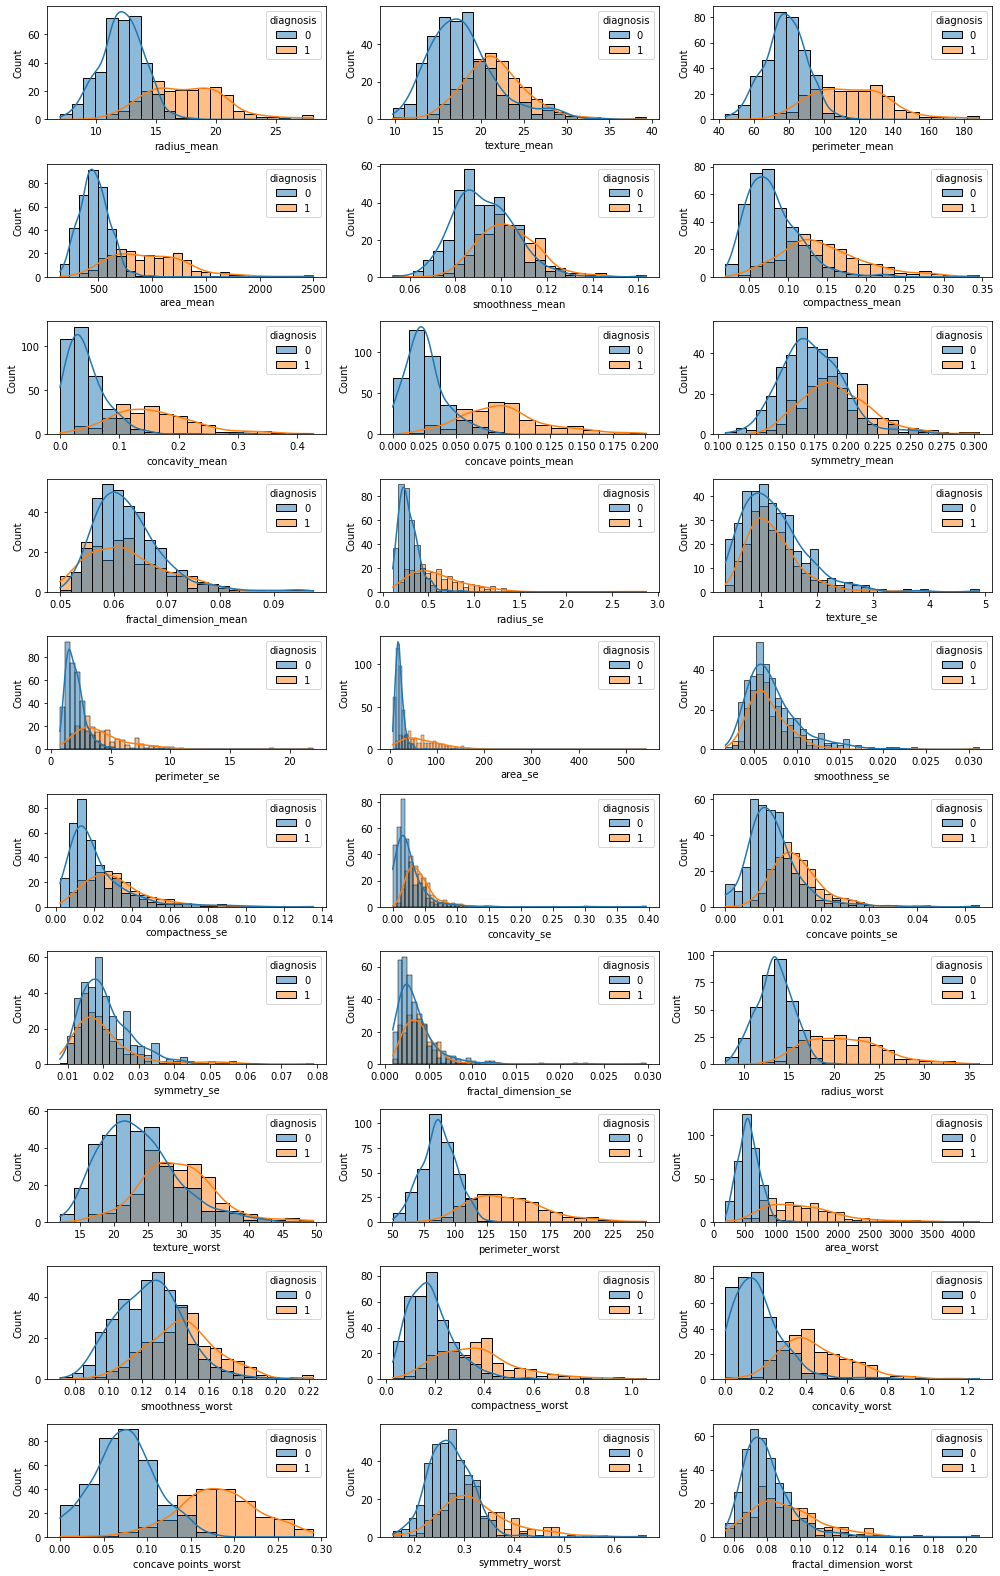

In [8]:
fig = plt.figure(figsize=(14,22)) # set figure
c = 1  # to change subplot number
for var in cols :
    plt.subplot(10, 3, c) # iterate through subplots
    sns.histplot(data=data, x=var, kde=True, hue = 'diagnosis') # plot histogram and kenel density plot
    plt.tight_layout() 
    c+=1
fig.savefig('Feature_Distribution.png') # save the figure 

In [9]:
y = data[['diagnosis']] # get the values for target
y.head() # view y

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [10]:
X = data.drop(['diagnosis'], axis = 1) # assign all features except target into variable X
X.head() # view X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
kmeans = KMeans(n_clusters = 2, random_state = 2021) # initialize k-means algorithm with 2 clusters and seed the seed 
y_pred = kmeans.fit_predict(X) # predict the clusters for each row of data

In [12]:
kmeans.cluster_centers_ # view the cluster centers

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

In [13]:
confusion_matrix(y, y_pred) # create confusion matrix

array([[356,   1],
       [ 82, 130]], dtype=int64)

In [14]:
accuracy_score(y, y_pred) # calculate accuracy

0.8541300527240774

*******************************************************************************************************************************

# Standardizing variables

In [15]:
sc = MinMaxScaler() # initialize minmaxscaler() to scale data
data_sc = sc.fit_transform(data) # scale and transform data and store it in data_sc

In [16]:
X = data_sc[:, 1:] # get all variables except target
y = data_sc[:, 0] # get target values

In [17]:
y_pred = kmeans.fit_predict(X)  # predict the clusters for each row of data

In [18]:
confusion_matrix(y, y_pred)  # create confusion matrix

array([[348,   9],
       [ 32, 180]], dtype=int64)

In [19]:
accuracy_score(y, y_pred) # calculate accuracy

0.9279437609841827

*******************************************************************************************************************************

# Removing features with standard errors and worst values

In [20]:
data = pd.read_csv('data.csv')  # read in the data

In [21]:
data = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']] # get specific columns of data
data['diagnosis'] = data['diagnosis'].map({"M":1,"B":0}) # map 1 to malignant diagnosis and 0 otherwise
data.head() # view data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [22]:
sc = MinMaxScaler() # initialize minmaxscaler() to scale data
data_sc = sc.fit_transform(data) # scale and transform data and store it in data_sc

In [23]:
X = data_sc[:, 1:] # get all variables except target
y = data_sc[:, 0]  # get target values

In [24]:
y_pred = kmeans.fit_predict(X)  # predict the clusters for each row of data

In [25]:
confusion_matrix(y, y_pred) # create confusion matrix

array([[352,   5],
       [ 52, 160]], dtype=int64)

In [26]:
accuracy_score(y, y_pred) # calculate accuracy

0.8998242530755711

*******************************************************************************************************************************

# Removing Features with mean values

In [27]:
data_replicate = data

In [28]:
for i in range(1, data.shape[1] ):
    print('Removing column :', data.columns[i]) 
    data = data.drop(data.columns[i], axis = 1) # remove the first column i
    sc = MinMaxScaler() # initialize minmaxscaler() to scale data
    data_sc = sc.fit_transform(data) # scale and transform data and store it in data_sc
    X = data_sc[:, 1:]  # get all variables except target
    y = data_sc[:, 0]  # get target values
    y_pred = kmeans.fit_predict(X) # predict the clusters for each row of data
    print('Accuracy :',accuracy_score(y, y_pred))  # calculate accuracy
    print(' ') # empty line
    data = data_replicate # reassign new data

Removing column : radius_mean
Accuracy : 0.8910369068541301
 
Removing column : texture_mean
Accuracy : 0.9015817223198594
 
Removing column : perimeter_mean
Accuracy : 0.8927943760984183
 
Removing column : area_mean
Accuracy : 0.8998242530755711
 
Removing column : smoothness_mean
Accuracy : 0.9086115992970123
 
Removing column : compactness_mean
Accuracy : 0.9138840070298769
 
Removing column : concavity_mean
Accuracy : 0.9121265377855887
 
Removing column : concave points_mean
Accuracy : 0.9015817223198594
 
Removing column : symmetry_mean
Accuracy : 0.9068541300527241
 
Removing column : fractal_dimension_mean
Accuracy : 0.9033391915641477
 


In [29]:
data = pd.read_csv('data.csv') # read in the data

In [30]:
data = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
data['diagnosis'] = data['diagnosis'].map({"M":1,"B":0}) # map 1 to malignant diagnosis and 0 otherwise

In [31]:
sc = MinMaxScaler()  # initialize minmaxscaler() to scale data
data_sc = sc.fit_transform(data) # scale and transform data and store it in data_sc

In [32]:
X = data_sc[:, 1:] # get all variables except target
y = data_sc[:, 0] # get target values
y_pred = kmeans.fit_predict(X) # predict the clusters for each row of data


In [33]:
confusion_matrix(y, y_pred) # create confusion matrix

array([[356,   1],
       [ 51, 161]], dtype=int64)

In [34]:
print('Accuracy :',accuracy_score(y, y_pred))  # calculate accuracy

Accuracy : 0.9086115992970123


*******************************************************************************************************************************

# Visualization using Principal Component Analysis

In [35]:
sc = StandardScaler() # initialize standardscaler() to scale data
data_standardized = sc.fit_transform(data) # scale and transform data and store it in data_sc

In [36]:
pca = PCA(n_components=2) # initialize pca algorithm

In [37]:
X_2d = pca.fit_transform(data_standardized) # fit and transform the standardized data using pca

In [38]:
X_kmeans = kmeans.fit_predict(X_2d) # predict the clusters for each row of data

In [39]:
pca_feat = pd.DataFrame(X_2d) # create a dataframe from numpy array
pca_feat['target'] = y # set y values to target variable
pca_feat.columns = ['feature1', 'feature2', 'target'] # rename columns
pca_feat.head() # view dataframe

,feature1,feature2,target
0,3.232070,3.364069,1.0
1,2.904707,-1.707764,1.0
2,3.851730,0.241288,1.0
3,1.170895,6.697362,1.0
4,3.288681,-0.705345,1.0


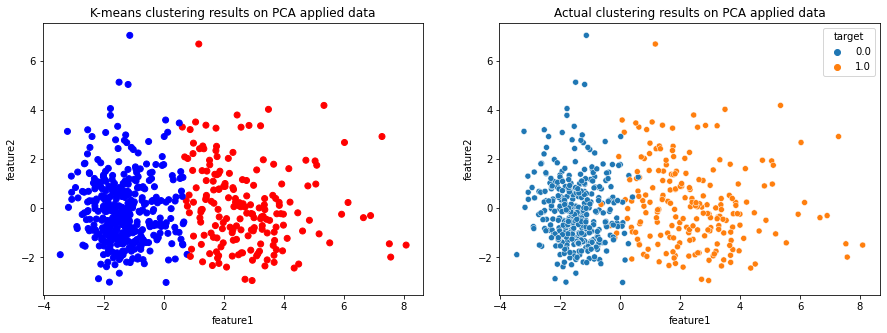

In [40]:
labels = {0 : 'b',1 : 'r'} # set labels to blue and red
label_color = [labels[i] for i in X_kmeans] # label each prediction by blue and red
plt.figure(figsize = (15, 5)) # set figure

plt.subplot(1, 2, 1) # set first subplot
plt.scatter(X_2d[:,0],X_2d[:,1], c= label_color) # plot scatterplot of the 2d data and predicted label
plt.title('K-means clustering results on PCA applied data') # set title
plt.xlabel('feature1') # set x-axis label
plt.ylabel('feature2') # set y-axis label

plt.subplot(1, 2, 2) # set second subplot
sns.scatterplot(data = pca_feat, x = 'feature1',y= 'feature2', hue = 'target') # plot scatterplot of the 2d data with actual label
plt.title('Actual clustering results on PCA applied data') # set title
plt.show() # display the plots